In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('BostonHousing.csv')

In [3]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('medv',axis=1), data['medv'], test_size=0.3, random_state=0)
x_train.shape, x_test.shape

((354, 13), (152, 13))

# گسسته سازی با فرکانس مساوی در کتابخانه Pandas:

In [5]:
# در ادامه ستون lstat به ده قسمت تقسیم میشود که هر قسمت تقریبا به تعداد مساوی نمونه دارد
x_train['lstat_disc'], intervals = pd.qcut(x_train['lstat'],10, labels=None, retbins=True, precision=3, duplicates='raise')
intervals

array([ 1.73 ,  4.623,  6.202,  7.528,  9.5  , 11.16 , 13.26 , 15.565,
       18.06 , 22.453, 36.98 ])

In [6]:
print(x_train[['lstat','lstat_disc']].head(10))

     lstat       lstat_disc
141  34.41  (22.453, 36.98]
272   7.73     (7.528, 9.5]
135  16.96  (15.565, 18.06]
298   4.97   (4.623, 6.202]
122  17.93  (15.565, 18.06]
22   18.72  (18.06, 22.453]
68   13.09   (11.16, 13.26]
20   21.02  (18.06, 22.453]
437  26.45  (22.453, 36.98]
14   10.26     (9.5, 11.16]


In [7]:
# بررسی درصد مشاهدات هر بازه. آنها باید تقریبا مشابه باشند
x_train['lstat_disc'].value_counts() / len(x_train)

lstat_disc
(7.528, 9.5]       0.104520
(1.729, 4.623]     0.101695
(13.26, 15.565]    0.101695
(15.565, 18.06]    0.101695
(22.453, 36.98]    0.101695
(4.623, 6.202]     0.098870
(6.202, 7.528]     0.098870
(11.16, 13.26]     0.098870
(9.5, 11.16]       0.096045
(18.06, 22.453]    0.096045
Name: count, dtype: float64

In [8]:
# اکنون متغیر lstat را در مجموعه تست گسسته سازی میکنیم ولی مرزبندی جدیدی نمیسازیم و از همان باکت بندی که روی داده آموزش استفاده کردیم برای داده تست هم استفاده میکنیم
x_test['lstat_disc'] = pd.cut(x=x_test['lstat'], bins=intervals)

In [9]:
x_test['lstat_disc'].value_counts()/len(x_test)

lstat_disc
(7.528, 9.5]       0.131579
(13.26, 15.565]    0.118421
(22.453, 36.98]    0.118421
(11.16, 13.26]     0.111842
(4.623, 6.202]     0.098684
(15.565, 18.06]    0.098684
(9.5, 11.16]       0.092105
(1.73, 4.623]      0.085526
(18.06, 22.453]    0.078947
(6.202, 7.528]     0.059211
Name: count, dtype: float64

Text(0, 0.5, 'Number of observations per bin')

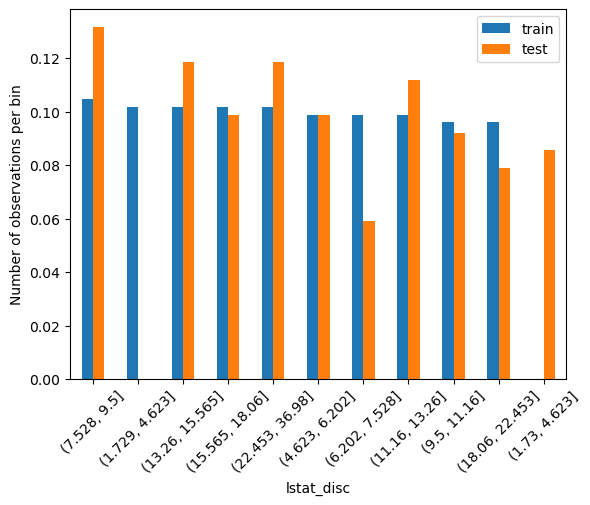

In [10]:
# اگر توزیعها در مجموعه آموزش و آزمایش یکسان باشد ، باید انتظار نسبت مشابهی از مشاهدات در فواصل مختلف در مجموعه آموزش و آزمایش داشته باشیم. آن را در زیر میبینیم
t1 = x_train['lstat_disc'].value_counts()/len(x_train)
t2 = x_test['lstat_disc'].value_counts()/len(x_test)

tmp = pd.concat([t1,t2],axis=1)
tmp.columns = ['train','test']

tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')